<a href="https://colab.research.google.com/github/aakankshakadam97/FlyTextMetrics/blob/main/BA_textanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving scraped_data.csv to scraped_data.csv


In [2]:
#import necessary libraries
import pandas as pd

In [3]:
#convert csv to pandas dataframe
df = pd.read_csv("/content/scraped_data.csv")

In [4]:
#check the dataframe
df.head()

,Heading,Div Text
0,Customer Reviews,✅ Trip Verified | Really terrible user experi...
1,"""can't even choose my own seat""",✅ Trip Verified | Very impressed with BA. Chec...
2,“Very impressed with BA”,"✅ Trip Verified | LHR - SFO, LAS - LGW August..."
3,"""appalling customer service""",Not Verified | I flew from Malaga via LHR to...
4,"""baggage customer service is a joke""",✅ Trip Verified | Milan to Miami return via L...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Heading   250 non-null    object
 1   Div Text  250 non-null    object
dtypes: object(2)
memory usage: 4.0+ KB


In [6]:
# Function to shift heading text up and remove "Customer Reviews"
def clean_headings(df, target_text="Customer Reviews"):
    # Find the indices where the target text is located
    customer_reviews_indices = df.index[df['Heading'] == target_text].tolist()

    # Loop through the indices and adjust the headings
    for index in customer_reviews_indices:
        if index + 1 < len(df):
            df.at[index, 'Heading'] = df.at[index + 1, 'Heading']
            df.at[index + 1, 'Heading'] = ""

    # Remove the target text from the headings
    df['Heading'] = df['Heading'].replace(target_text, "")

    # Remove any empty rows if needed
    df = df[df['Heading'] != ""]

    return df

# Clean the headings
df_cleaned = clean_headings(df)

# Display the cleaned DataFrame
print("\nCleaned DataFrame:")
print(df_cleaned)


Cleaned DataFrame:
                                    Heading  \
0           "can't even choose my own seat"   
2                  “Very impressed with BA”   
3              "appalling customer service"   
4      "baggage customer service is a joke"   
5               "Worst business class ever"   
..                                      ...   
245  "Last time I will fly British Airways"   
246     "cancel your flight without notice"   
247          "flights changed with no cost"   
248            "Cheap, quick and efficient"   
249      "the worst major European airline"   

                                              Div Text  
0    ✅ Trip Verified |  Really terrible user experi...  
2    ✅ Trip Verified |  LHR - SFO, LAS - LGW August...  
3    Not Verified |   I flew from Malaga via LHR to...  
4    ✅ Trip Verified |  Milan to Miami return via L...  
5    ✅ Trip Verified |  BA created a new low-cost s...  
..                                                 ...  
245  Not Verifie

In [7]:
#data cleaning
import pandas as pd
import re
from bs4 import BeautifulSoup
import string

# Function to clean text
def clean_text(text):
    # Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()

    # Remove non-ASCII characters
    text = text.encode("ascii", "ignore").decode()

    # Remove special characters, emojis, and punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Convert to lowercase
    text = text.lower()

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [8]:
# Apply cleaning to both columns
df_cleaned['Cleaned_Heading'] = df_cleaned['Heading'].apply(clean_text)
df_cleaned['Cleaned_Div_text'] = df_cleaned['Div Text'].apply(clean_text)

<ipython-input-7-112c445c644d>:10: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()
<ipython-input-8-1cf3203694ab>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Cleaned_Heading'] = df_cleaned['Heading'].apply(clean_text)
<ipython-input-7-112c445c644d>:10: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()
<ipython-input-8-1cf3203694ab>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [9]:
# Display cleaned dataframe
print(df_cleaned[['Cleaned_Heading', 'Cleaned_Div_text']])

                          Cleaned_Heading  \
0            cant even choose my own seat   
2                  very impressed with ba   
3              appalling customer service   
4      baggage customer service is a joke   
5               worst business class ever   
..                                    ...   
245  last time i will fly british airways   
246     cancel your flight without notice   
247          flights changed with no cost   
248             cheap quick and efficient   
249      the worst major european airline   

                                      Cleaned_Div_text  
0    trip verified really terrible user experience ...  
2    trip verified lhr sfo las lgw august 2023 in c...  
3    not verified i flew from malaga via lhr to bos...  
4    trip verified milan to miami return via london...  
5    trip verified ba created a new lowcost subsidi...  
..                                                 ...  
245  not verified top ten reasons to not use britis...  
246

In [10]:
# Function to extract verification status and clean text
def extract_verification(text):
    trip_verified_pattern = r"^trip verified"
    not_verified_pattern = r"^not verified"

    if re.match(trip_verified_pattern, text):
        verification_status = "trip verified"
        cleaned_text = re.sub(trip_verified_pattern, '', text).strip()
    elif re.match(not_verified_pattern, text):
        verification_status = "not verified"
        cleaned_text = re.sub(not_verified_pattern, '', text).strip()
    else:
        verification_status = "unknown"
        cleaned_text = text.strip()

    return verification_status, cleaned_text

# Apply the function and create new columns
df_cleaned[['Verification_Status', 'Description']] = df_cleaned['Cleaned_Div_text'].apply(
    lambda x: pd.Series(extract_verification(x))
)

# Display the resulting dataframe
print(df_cleaned)

                                    Heading  \
0           "can't even choose my own seat"   
2                  “Very impressed with BA”   
3              "appalling customer service"   
4      "baggage customer service is a joke"   
5               "Worst business class ever"   
..                                      ...   
245  "Last time I will fly British Airways"   
246     "cancel your flight without notice"   
247          "flights changed with no cost"   
248            "Cheap, quick and efficient"   
249      "the worst major European airline"   

                                              Div Text  \
0    ✅ Trip Verified |  Really terrible user experi...   
2    ✅ Trip Verified |  LHR - SFO, LAS - LGW August...   
3    Not Verified |   I flew from Malaga via LHR to...   
4    ✅ Trip Verified |  Milan to Miami return via L...   
5    ✅ Trip Verified |  BA created a new low-cost s...   
..                                                 ...   
245  Not Verified | Top Ten R

<ipython-input-10-4d8a65a49a18>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[['Verification_Status', 'Description']] = df_cleaned['Cleaned_Div_text'].apply(
<ipython-input-10-4d8a65a49a18>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[['Verification_Status', 'Description']] = df_cleaned['Cleaned_Div_text'].apply(


In [11]:
print(df_cleaned[['Cleaned_Heading','Verification_Status', 'Description']])

                          Cleaned_Heading Verification_Status  \
0            cant even choose my own seat       trip verified   
2                  very impressed with ba       trip verified   
3              appalling customer service        not verified   
4      baggage customer service is a joke       trip verified   
5               worst business class ever       trip verified   
..                                    ...                 ...   
245  last time i will fly british airways        not verified   
246     cancel your flight without notice        not verified   
247          flights changed with no cost       trip verified   
248             cheap quick and efficient       trip verified   
249      the worst major european airline        not verified   

                                           Description  
0    really terrible user experience british airway...  
2    lhr sfo las lgw august 2023 in club world its ...  
3    i flew from malaga via lhr to boston on the

In [12]:
#Text analysis

!pip install pandas gensim nltk scikit-learn
import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [13]:
#preprocess data
stop_words = set(stopwords.words('english'))

def preprocess(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return tokens

df_cleaned['cleaned_description'] = df_cleaned['Description'].apply(preprocess)


<ipython-input-13-d7a8b36c42c3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['cleaned_description'] = df_cleaned['Description'].apply(preprocess)


In [14]:
#Create a dictionary and a corpus for LDA:
dictionary = corpora.Dictionary(df_cleaned['cleaned_description'])
corpus = [dictionary.doc2bow(text) for text in df_cleaned['cleaned_description']]


In [15]:
#Train the LDA model:
lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)


In [16]:
#Print the topics:
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)


(0, '0.036*"flight" + 0.012*"us" + 0.010*"ba" + 0.009*"service" + 0.008*"get"')
(1, '0.021*"ba" + 0.021*"flight" + 0.014*"class" + 0.013*"business" + 0.011*"crew"')
(2, '0.012*"ba" + 0.008*"flight" + 0.007*"seats" + 0.006*"seat" + 0.005*"class"')
(3, '0.013*"flight" + 0.013*"ba" + 0.007*"time" + 0.007*"seats" + 0.005*"even"')
(4, '0.019*"ba" + 0.011*"flight" + 0.010*"service" + 0.008*"cabin" + 0.007*"crew"')




1.   Topic 0:
The words "ba", "service", "class", "first", and "us" are the most significant for this topic.

The weights (e.g., 0.015 for "ba") indicate how strongly each word is associated with this topic.

This topic might be related to overall impressions and experiences with BA (British Airways) service, especially in different classes like first class.

2.   Topic 4:
The words "flight", "ba", "luggage", "service", and "never" are significant.

This topic could relate to issues with luggage and service, possibly indicating negative experiences or complaints.



In [17]:
#distribution of topics across the document
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

# Prepare the visualization data
vis_data = gensimvis.prepare(lda_model, corpus, dictionary)

# Display the visualization
pyLDAvis.display(vis_data)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 11.2 MB/s eta 0:00:00


In [20]:
!pip install vaderSentiment


#build sentiment analyser
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment score
def get_sentiment_score(text):
    sentiment_dict = analyzer.polarity_scores(text)
    return sentiment_dict['compound']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.3 MB/s eta 0:00:00


In [21]:
#Define a Function to Compute Sentiment
def get_sentiment_score(text):
    sentiment_dict = analyzer.polarity_scores(text)
    return sentiment_dict['compound']

# Apply the function to your dataframe
df_cleaned['sentiment_score'] = df_cleaned['Description'].apply(get_sentiment_score)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-21-9446429c2a1b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['sentiment_score'] = df_cleaned['Description'].apply(get_sentiment_score)


In [22]:
#classify sentiments
def classify_sentiment(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df_cleaned['sentiment'] = df_cleaned['sentiment_score'].apply(classify_sentiment)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-22-cbd66c85a5d0>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['sentiment'] = df_cleaned['sentiment_score'].apply(classify_sentiment)


In [23]:
# Display the first few rows of the dataframe
print(df_cleaned.head())

# Get the distribution of sentiments
sentiment_distribution = df_cleaned['sentiment'].value_counts()
print(sentiment_distribution)


                                Heading  \
0       "can't even choose my own seat"   
2              “Very impressed with BA”   
3          "appalling customer service"   
4  "baggage customer service is a joke"   
5           "Worst business class ever"   

                                            Div Text  \
0  ✅ Trip Verified |  Really terrible user experi...   
2  ✅ Trip Verified |  LHR - SFO, LAS - LGW August...   
3  Not Verified |   I flew from Malaga via LHR to...   
4  ✅ Trip Verified |  Milan to Miami return via L...   
5  ✅ Trip Verified |  BA created a new low-cost s...   

                      Cleaned_Heading  \
0        cant even choose my own seat   
2              very impressed with ba   
3          appalling customer service   
4  baggage customer service is a joke   
5           worst business class ever   

                                    Cleaned_Div_text Verification_Status  \
0  trip verified really terrible user experience ...       trip verified   
2  tr

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


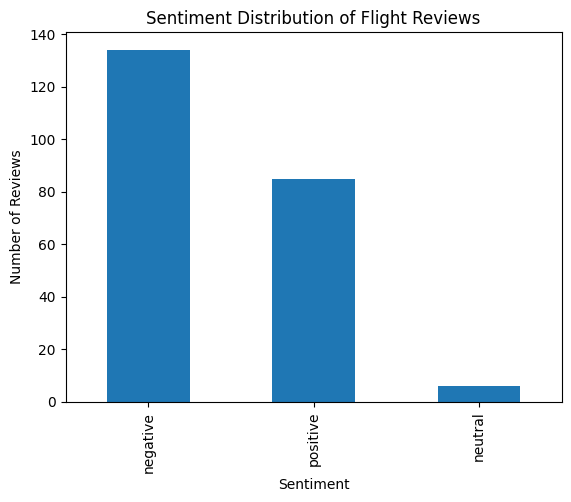

In [24]:
import matplotlib.pyplot as plt

# Plot the sentiment distribution
sentiment_distribution.plot(kind='bar')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.title('Sentiment Distribution of Flight Reviews')
plt.show()


In [25]:
df_cleaned

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Heading,Div Text,Cleaned_Heading,Cleaned_Div_text,Verification_Status,Description,cleaned_description,sentiment_score,sentiment
0,"""can't even choose my own seat""",✅ Trip Verified | Really terrible user experi...,cant even choose my own seat,trip verified really terrible user experience ...,trip verified,really terrible user experience british airway...,"[really, terrible, user, experience, british, ...",-0.8488,negative
2,“Very impressed with BA”,"✅ Trip Verified | LHR - SFO, LAS - LGW August...",very impressed with ba,trip verified lhr sfo las lgw august 2023 in c...,trip verified,lhr sfo las lgw august 2023 in club world its ...,"[lhr, sfo, las, lgw, august, club, world, sham...",0.9313,positive
3,"""appalling customer service""",Not Verified | I flew from Malaga via LHR to...,appalling customer service,not verified i flew from malaga via lhr to bos...,not verified,i flew from malaga via lhr to boston on the 4t...,"[flew, malaga, via, lhr, boston, may, arrival,...",-0.8900,negative
4,"""baggage customer service is a joke""",✅ Trip Verified | Milan to Miami return via L...,baggage customer service is a joke,trip verified milan to miami return via london...,trip verified,milan to miami return via london worst busines...,"[milan, miami, return, via, london, worst, bus...",-0.8297,negative
5,"""Worst business class ever""",✅ Trip Verified | BA created a new low-cost s...,worst business class ever,trip verified ba created a new lowcost subsidi...,trip verified,ba created a new lowcost subsidiary in ba euro...,"[ba, created, new, lowcost, subsidiary, ba, eu...",0.9857,positive
...,...,...,...,...,...,...,...,...,...
245,"""Last time I will fly British Airways""",Not Verified | Top Ten REASONS to not use Brit...,last time i will fly british airways,not verified top ten reasons to not use britis...,not verified,top ten reasons to not use british airways to ...,"[top, ten, reasons, use, british, airways, awa...",-0.2348,negative
246,"""cancel your flight without notice""",Not Verified | Easy check in on the way to He...,cancel your flight without notice,not verified easy check in on the way to heath...,not verified,easy check in on the way to heathrow the fligh...,"[easy, check, way, heathrow, flight, time, iss...",-0.0516,negative
247,"""flights changed with no cost""",✅ Trip Verified | Online check in worked fine...,flights changed with no cost,trip verified online check in worked fine quic...,trip verified,online check in worked fine quick security che...,"[online, check, worked, fine, quick, security,...",0.8479,positive
248,"""Cheap, quick and efficient""",✅ Trip Verified |. The BA first lounge at Term...,cheap quick and efficient,trip verified the ba first lounge at terminal ...,trip verified,the ba first lounge at terminal 5 was a zoo at...,"[ba, first, lounge, terminal, zoo, dirty, tabl...",-0.1289,negative


In [26]:
#Build wordcloud
from wordcloud import WordCloud

# Combine all the descriptions into a single string
text = " ".join(df_cleaned['Description'].astype(str))

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


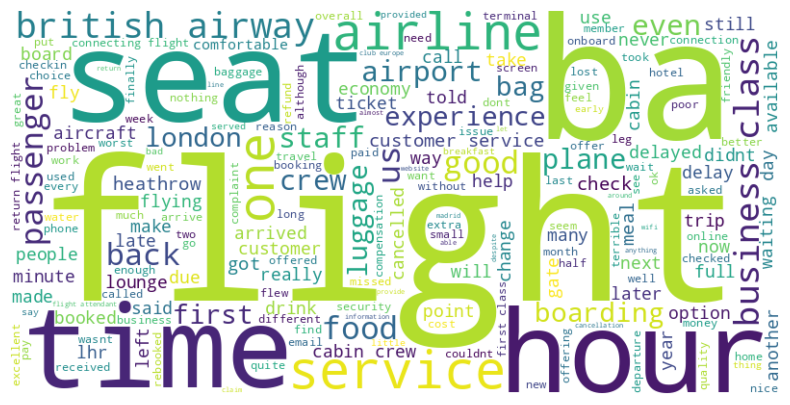

In [27]:
#Visualize the Word Cloud
# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


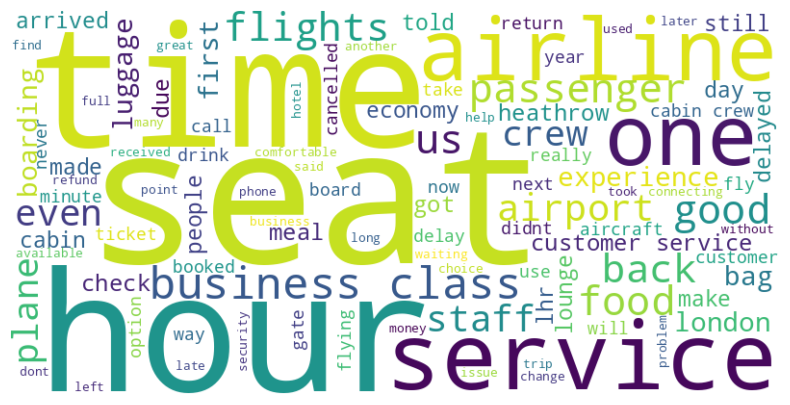

In [28]:
from wordcloud import STOPWORDS

# Define additional stopwords
stopwords = set(STOPWORDS)
stopwords.update(["flight", "ba", "british", "airways"])

# Create the word cloud with custom settings
wordcloud = WordCloud(width=800, height=400,
                      background_color='white',
                      stopwords=stopwords,
                      max_words=100,
                      colormap='viridis',
                      contour_width=3,
                      contour_color='steelblue').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
